In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# IA - Labyrinth

In [2]:
def generate_labyrinth(width, height, wall_ratio=0.3):
    """ Randomly generates the labyrinth matrix, the values are:
    0 if the cell is free
    1 if there is a wall
    :param width int: width of the matrix
    :param height int: height of the matrix
    :wall_ratio float: chance for a cell to be a wall
    :return: tuple composed of:
    <matrix>: numpy 2d array
    <start_cell>: tuple of i, j indices for the start cell
    <end_cell>: tuple of i, j indices for the end cell
    """
    grid = np.random.rand(width, height)
    grid[grid >= 1 - wall_ratio] = 1
    grid[grid < 1 - wall_ratio] = 0
    free_cell_top = [i for i in range(0, width) if grid[0][i] != 1]
    start_idx = random.choice(free_cell_top)
    start_cell = (0, start_idx)
    free_cell_bottom = [i for i in range(0, width) if grid[-1][i] != 1]
    end_idx = random.choice(free_cell_bottom)
    end_cell = (height - 1, end_idx)
    return grid, start_cell, end_cell

In [3]:
def display_labyrinth(grid, start_cell, end_cell, solution=None):
    """ Display the labyrinth matrix and possibly the solution with matplotlib.
    Free cell will be in light gray.
    Wall cells will be in dark gray.
    Start and end cells will be in dark blue.
    Path cells (start, end excluded) will be in light blue.
    :param grid np.array: labyrinth matrix
    :param start_cell: tuple of i, j indices for the start cell
    :param end_cell: tuple of i, j indices for the end cell
    :param solution: list of successive tuple i, j indices who forms the path
    """
    grid = np.array(grid, copy=True)
    FREE_CELL = 19
    WALL_CELL = 16
    START = 0
    END = 0
    PATH = 2
    grid[grid == 0] = FREE_CELL
    grid[grid == 1] = WALL_CELL
    grid[start_cell] = START
    grid[end_cell] = END
    if solution:
        solution = solution[1:-1]
        for cell in solution:
            grid[cell] = PATH
    else:
        print("No solution has been found")
    plt.matshow(grid, cmap="tab20c")

In [4]:
grid, start_cell, end_cell = generate_labyrinth(10, 10)

No solution has been found


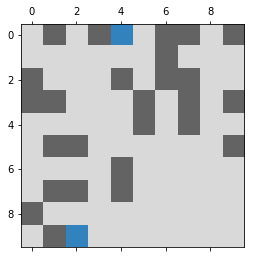

In [5]:
display_labyrinth(grid, start_cell, end_cell)

In [8]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

c:\users\kim.biloni\appdata\local\programs\python\python36\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [9]:
toolbox = base.Toolbox()

# Conception

Cette section visent à analyser le sujet afin de conceptualiser un code cohérent à la résolution du problème.

## Opérations

Il faut donc définir les opérations possibles :

- right
- up
- left
- down

Nous pouvons identifier les opérations comme les gênes de notre individu.

## Individu

Ce dernier sera donc une liste d'opérations. Sa taille ira de la hauteur du labyrith à la hauteur * la largeur du labyrinth.

## Fonction de fitness

La fonction de fitness devra donc donner une valeur au chemin. Un bon chemin aura une valeur faible et un mauvais chemin aura une valeur évlevé.

Si on reprend les connaissances que nous avons sur les heuristiques du TP A*, un bon chemin serait donc un chemin direct entre le point de départ et le point d'arriver. Appliqué à notre labyrinthe et à nos diverses opérations, un bon chemin sera donc composé que de la direction down présente h fois dans la liste pour une liste de longueur h.

### Directions horizontales

Les directions horizontales doivent avoir un coût dépendamment de la différence du point de départ et d'arrivé sur l'axe x. La fonction pour cette axe pourra ressembler à ça :

```python
def x_axis_score(individu, start, end):
    displacement = 0
    for c in individu:
        if c is right:
            displacement+=1
        elif c is left:
            displacement-=1
    return end - start + ou - displacement....
```

En faisant `end - start`, le signe du resultat nous indique la direction avec positif signifiant droite et négatif signifiant gauche.  En additionnant la différence de déplacement, on peut savoir si le chemin est allé dans la bonne direction ou pas. 

Avec cette fonction de fitness, nous pouvons identifier les cas suivants:

- la différence entre start_x et end_x vaut 0
    - les déplacements sont uniformes: la valeur de displacement sera proche de 0 et donc la fonction retournera 0
    - les déplacements tirent sur la gauche: la valeur de displacement sera négative et donc la fonction retournera une valeur ......
    - les déplacments tirent sur la droite: la valeur de displacement sera positive et donc la fonction retournera une valeur ......
- la différence entre start_x et end_x est positive (il faut se déplacer à droite)
    - les déplacements sont uniformes: displacment ~= 0 -> la fonction retourne à nouveau un résultat positif (inidique qu'il n'y a que pas d'effet.
    - les déplacements tirent sur la gauche: displacement < 0 -> fct 
    